<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Market-Share-Data" data-toc-modified-id="Market-Share-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Market Share Data</a></span></li><li><span><a href="#Using-sklearn-linear-regresson-ols" data-toc-modified-id="Using-sklearn-linear-regresson-ols-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Using sklearn linear regresson ols</a></span></li></ul></div>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [10, 8]
plt.style.use('fivethirtyeight')
%matplotlib inline

https://newonlinecourses.science.psu.edu/stat501/node/397/

# Market Share Data
Here we have market share data for n = 36 consecutive months (market_share.txt). Let Y = market share of the product; X1 = price; X3 = 1 if discount promotion in effect and 0 otherwise; X3X4 = 1 if both discount and package promotions in effect and 0 otherwise.

In [2]:
infile = 'market_share.txt'
df = pd.read_csv(infile,sep='\t',encoding='utf-16')
df.head()

,ID,Marketshare,Price,Discount,Promotion,Month,Year
0,1,3.15,2.198,1,1,Sep,1999
1,2,2.52,2.186,0,0,Oct,1999
2,3,2.64,2.293,1,1,Nov,1999
3,4,2.55,2.420,0,1,Dec,1999
4,5,2.69,2.179,1,0,Jan,2000


In [3]:
import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf

In [4]:
x = df.values[:,2:5].astype(float)
y = df.values[:,1].astype(float)
x.shape, y.shape, y[:5]

((36, 3), (36,), array([3.15, 2.52, 2.64, 2.55, 2.69]))

In [5]:
x1 = sm.add_constant(x)
results = smf.OLS(y,x1).fit()

# Inspect the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     25.68
Date:                Sat, 22 Jun 2019   Prob (F-statistic):           1.19e-08
Time:                        12:03:58   Log-Likelihood:                 19.386
No. Observations:                  36   AIC:                            -30.77
Df Residuals:                      32   BIC:                            -24.44
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.1853      0.365      8.726      0.0

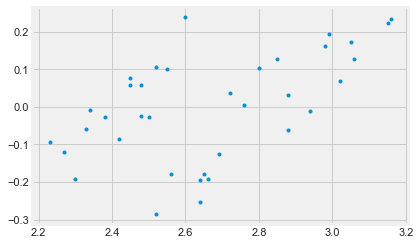

In [6]:
residuals = results.resid
plt.plot(y,residuals,'.')

# Using sklearn linear regresson ols

In [9]:
# plot of residuals
from yellowbrick.regressor import ResidualsPlot
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [13]:
x.shape, y.shape, np.atleast_2d(y).shape

((36, 3), (36, 1), (36, 1))

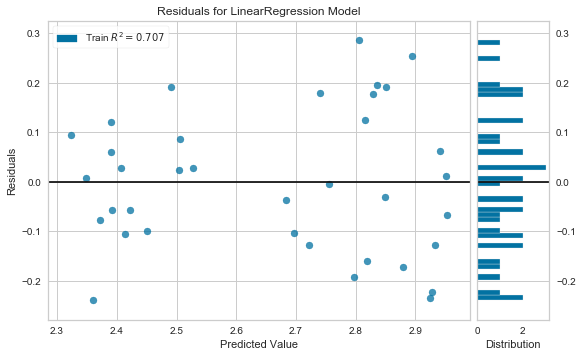

In [12]:
y = y.reshape(-1,1)

lr = LinearRegression()
viz = ResidualsPlot(lr)
viz.fit(x1,y)
viz.poof()